## Importing all necessary files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\singh\Desktop\PYTHON\MY PROJECTS\all_data.csv")


## Checking and Deleting null values

In [2]:
data.isnull().sum()                #### check all null values.

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [3]:
df_nan = data[data.isna().any(axis=1)]        ### check all the rows of null values.
df_nan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.dropna(inplace=True)              ### drop all null values

In [5]:
data.isnull().sum()                    ### check all null values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Adding a column month to our table for analysis

In [6]:
data = data[data["Order Date"].str[0:2]!="Or"]    # we did this because it was showing an "error" for "or" 
data["month"] = data["Order Date"].str[0:2]       # it will create a month table from order table

#data["month"] = data["month"].astype("int32")    # it is also a way to convert dtype

data["month"] = pd.to_numeric(data["month"])      # it will change datatype from object to int64

d


### Q1. What was the best month for sales? How much was earned that month?

In [7]:
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


###### lets make a "sales" column for ease in analysis

In [11]:
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"]) ## we change the dtype to int
data["Price Each"] = pd.to_numeric(data["Price Each"])             ## we change the dtype to int
data["sales"]=data["Price Each"]*data["Quantity Ordered"]          ## create a new table sales.

In [13]:
data.dtypes                                                        # sales column has been created with "float" datatype.

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
sales               float64
dtype: object

In [14]:
result = data.groupby("month").sum() ## ie best month of sales was 12th month.
result

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


###### lets lets analyse the above data using matplotlib.

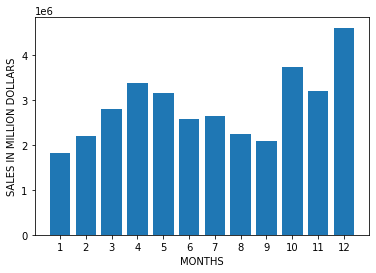

In [15]:
months = range(1,13)                 ### it will select a range from n to (n-1) ie 1 to 12

plt.bar(months,result["sales"])          ### it will plot the bar graph.
plt.xticks(months)                        ## it is used to ticks in x axis.
plt.xlabel("MONTHS")                      ## it is used to print x label.
plt.ylabel("SALES IN MILLION DOLLARS")     ## it is used to print y label.
plt.show()

### Q2. Which city has the highest  number of sales?

In [16]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


###### lets create a "city" column from "Purchase Address" column for ease of analysis.

In [17]:
### Here, we have created a new column "city" from "Purchase Address" column using apply() method.

data["city"] = data["Purchase Address"].apply(lambda x: x.split(",")[1]+" "+x.split(",")[2].split(" ")[1])
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA


In [19]:
# it shows the total sales by each city.

result1 = data.groupby("city").sum()                   
result1

,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


## let us visualize the above data using matplolib.

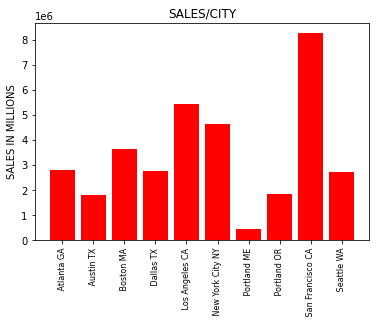

In [23]:
### we can clearly see that the "SAN FRANCISCO CA" had the best sales.

cities = data["city"].unique()

### Here we have used LIST comprehension, because if we dont do that our x- axis and y-axis are not in the same correct order.
### REFERENCE used is stackoverflow.

cities = [city for city, df in data.groupby("city")]  

plt.bar(cities, result1["sales"],color="red")
plt.xticks(cities, rotation="vertical",size=8 )
plt.ylabel("SALES IN MILLIONS")
plt.title("SALES/CITY")
plt.show()

### Q3. What time should we display the advertisement to maximize the likelihood of customers by the product?

In [24]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA


###### To do this first we need to extract "time" from "Order Date" column..    lets create a new column "hours".

In [25]:
data["Order Date"]=pd.to_datetime(data["Order Date"])  ### this change the datatype to "DATETIME"

In [26]:
data["hour"]=data["Order Date"].dt.hour                 ### this will create a new column "hour"

In [27]:
data.head(2)      #### now we have created a new column hours.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22


In [28]:
result3 = data.groupby("hour").count()       ### it will show a table groupby "hour" and count all its values.
result3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


###### now lets visualize the data using matplotlib

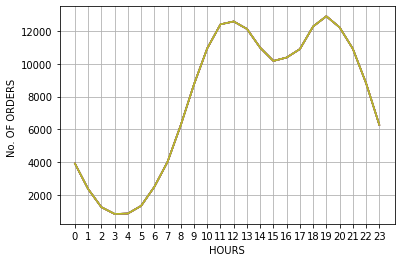

In [30]:
hours = [hour for hour, df in data.groupby("hour")]  

plt.plot(hours,result3)
plt.xticks(hours)
plt.xlabel("HOURS")
plt.ylabel("No. OF ORDERS ")
plt.grid()                                   ### it create grid in the below plot.
plt.show()

###### from the above visualization we can conculde that hours- 11,12,13,19 are the best hours to maximise sales.

###  Q4.What products are sold the most? Why do you think it did?

In [31]:
a = data.groupby("Product")                       ### here data is grouped by "product"
quantity_ordered = a.sum()["Quantity Ordered"]    ### it will sum the "quantity_ordered"

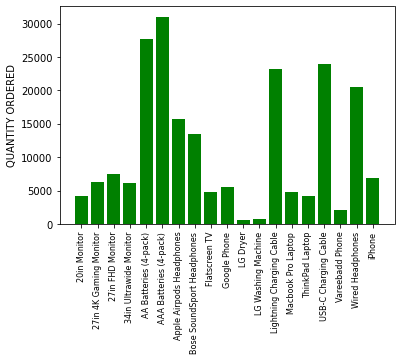

In [33]:
products = [product for product, df in a]

plt.bar(products,quantity_ordered,color="green")
plt.xticks(products,rotation="vertical",size=8)
plt.ylabel("QUANTITY ORDERED")
plt.show()